# <font color='Purple'>**Convolutional Neural Network (CNN) using Fashion MNIST Dataset**</font>
## <font color='green'>**Dataset Information**</font>
Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes, consisting of 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', and 'Ankle boot'

## <font color='green'>**Import the Required Libraries & Modules**</font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,models,layers
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

## <font color='green'>**Load the Fashion_MNIST dataset**</font>

In [ ]:
#(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()
(X_trains,y_train), (X_test,y_test)= load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
y_train[0]

9

## <font color='green'>**Dataset Visualization**</font>

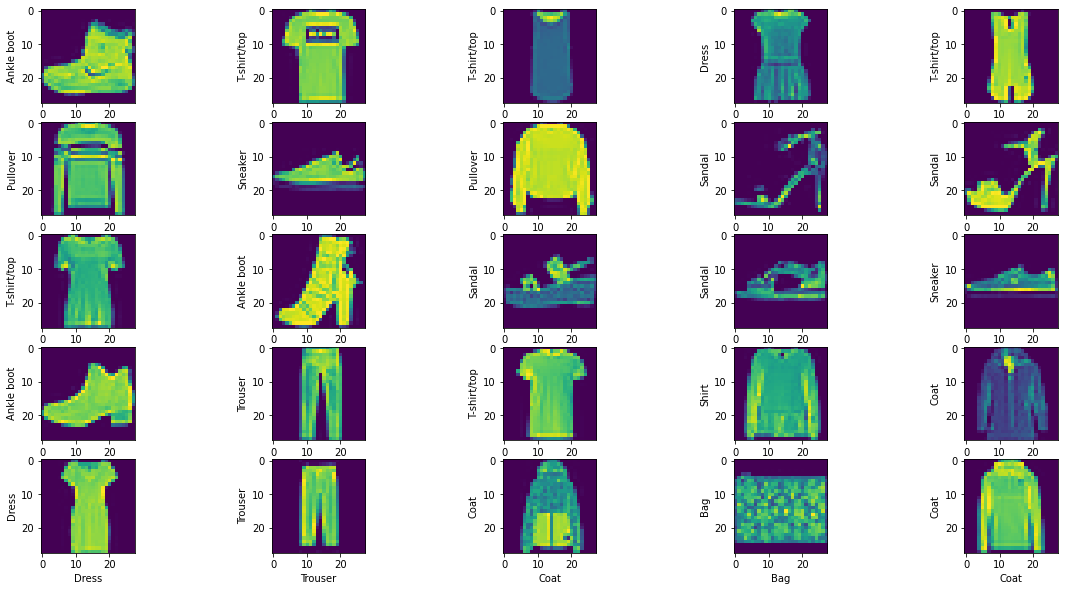

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_trains[i])
  plt.xlabel(class_names[y_train[i]])
  plt.ylabel(class_names[y_train[i]])
plt.show()
plt.tight_layout();

## <font color='green'>**Data Preprocessing**</font>

In [ ]:
X_trains.shape

(60000, 28, 28)

In [ ]:
X_train= X_trains.reshape((X_trains.shape[0],X_trains.shape[1],X_trains.shape[2],1))
X_train.shape

(60000, 28, 28, 1)

In [ ]:
input_shape=X_train.shape[1:]
input_shape

(28, 28, 1)

In [ ]:
from numpy import unique
n_classes= len(unique(y_train))
n_classes

10

In [ ]:
#train_images,test_images= train_images/255, test_images/255
X_train= X_trains.astype('float32')/255.0
X_train[0:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [ ]:
X_test= X_test.astype('float32')/255.0

## <font color='green'>**Model Development & Evaluation**</font>

In [ ]:
# Apply Convolution and ReLU
# Apply filter (Number of filters = 32, Kernel size = (3,3)) with Convolution to filter an image for a particular feature
# Detect that feature within the filtered image using ReLU
#model=models.Sequential()
model=Sequential()
#model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform', input_shape=input_shape))

# Apply MaxPool (Condense the image to enhance the features using maximum pooling with pool size = (2,2)))
# model.add(layers.MaxPooling2D(2,2))
model.add(MaxPool2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

# Apply Flatten to transform matrix to vector form
#model.add(layers.Flatten())
model.add(Flatten())

# Define model
model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(n_classes,activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit model
history = model.fit(X_train, y_train, epochs=75, batch_size=128,verbose=1)

# Evaluate Model
loss, acc = model.evaluate(X_test, y_test)

Epoch 1/75
469/469 [==============================] - 36s 74ms/step - loss: 0.5611 - accuracy: 0.7973
Epoch 2/75
469/469 [==============================] - 30s 64ms/step - loss: 0.3673 - accuracy: 0.8690
Epoch 3/75
469/469 [==============================] - 31s 66ms/step - loss: 0.3179 - accuracy: 0.8841
Epoch 4/75
469/469 [==============================] - 30s 65ms/step - loss: 0.2871 - accuracy: 0.8970
Epoch 5/75
469/469 [==============================] - 30s 64ms/step - loss: 0.2664 - accuracy: 0.9025
Epoch 6/75
469/469 [==============================] - 31s 65ms/step - loss: 0.2490 - accuracy: 0.9084
Epoch 7/75
469/469 [==============================] - 31s 65ms/step - loss: 0.2317 - accuracy: 0.9155
Epoch 8/75
469/469 [==============================] - 31s 67ms/step - loss: 0.2176 - accuracy: 0.9207
Epoch 9/75
469/469 [==============================] - 30s 65ms/step - loss: 0.2033 - accuracy: 0.9251
Epoch 10/75
469/469 [==============================] - 30s 65ms/step - loss: 0.192

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 100)               1

Accuracy of model is : 0.916


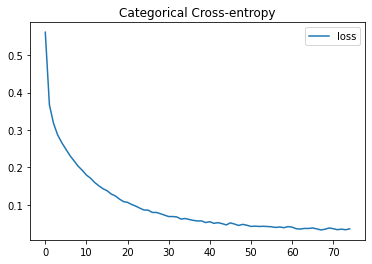

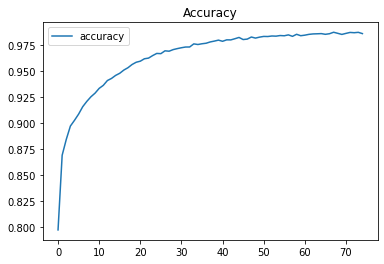

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss']].plot(title="Categorical Cross-entropy")
history_df.loc[:, ['accuracy']].plot(title="Accuracy")
print('Accuracy of model is : %.3f' %acc)

## <font color='green'>**Model Prediction**</font>

1/1 [==============================] - 0s 73ms/step
Predicted = 0
Original =  T-shirt/top
Predicted =  T-shirt/top


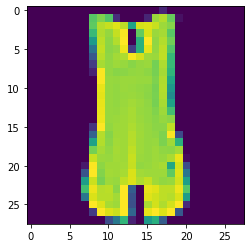

In [ ]:
# Predict Model
image=X_train[4]
from numpy import argmax
ypred= model.predict(np.asarray([image]))
print('Predicted = %d' %argmax(ypred))
print('Original = ',class_names[y_train[4]])
print('Predicted = ',class_names[argmax(ypred)])
plt.imshow(X_trains[4]);